<a href="https://colab.research.google.com/github/rijalammar1/PVCK_RijalAmmar/blob/main/Jobsheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

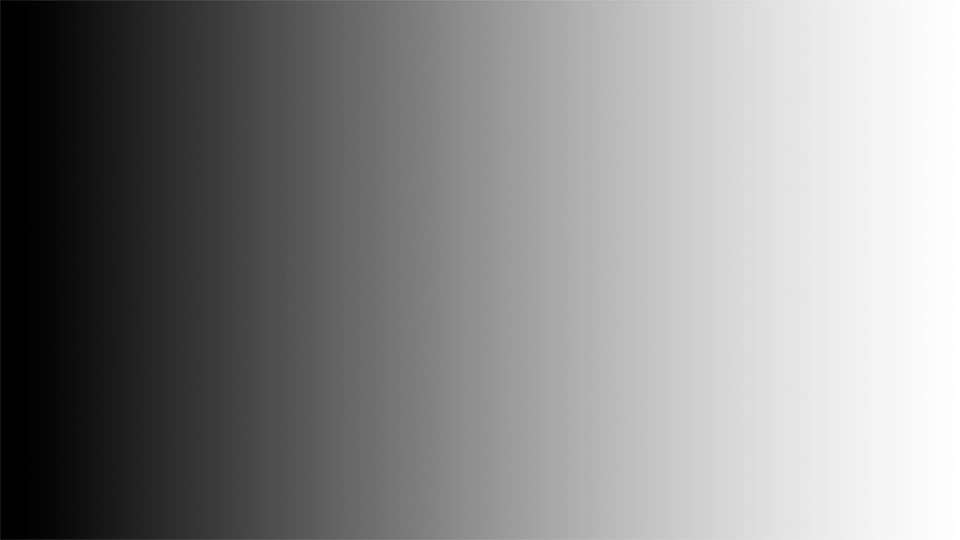

In [3]:
input_image = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/gradient.jpg')
cv2_imshow(input_image)

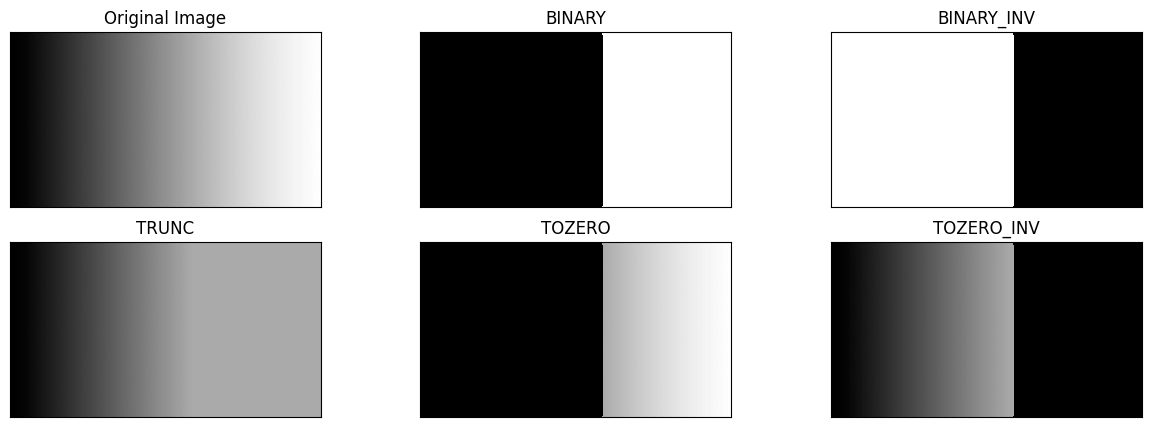

In [4]:
# Global Threshold
# Output image
thresh1 = input_image.copy()
thresh2 = input_image.copy()
thresh3 = input_image.copy()
thresh4 = input_image.copy()
thresh5 = input_image.copy()
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [input_image, thresh1, thresh2, thresh3, thresh4, thresh5]

# Thresholding
thresh = 170

def globalthreshold(threshold, img, type):
  for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
      for c in range(input_image.shape[2]):
        # Binary Threshold
        if(type == 1):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 255
          else:
            img[i,j,c] = 0
        # Binary-Inverted Threshold
        elif(type == 2):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = 255
        # Truncate Threshold
        elif(type == 3):
          if(img[i,j,c] > threshold):
            img[i,j,c] = threshold
          else:
            img[i,j,c] = img[i,j,c]
        # Threshold To Zero
        elif(type == 4):
          if(img[i,j,c] > threshold):
            img[i,j,c] = img[i,j,c]
          else:
            img[i,j,c] = 0
        # Threshold To Zero – Inverted
        elif(type == 5):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = img[i,j,c]
  return img

# Memanggil fungsi globalThreshold
for a in range(1, len(images)):
  images[a] = globalthreshold(thresh, images[a], a)

#Membuat figure
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

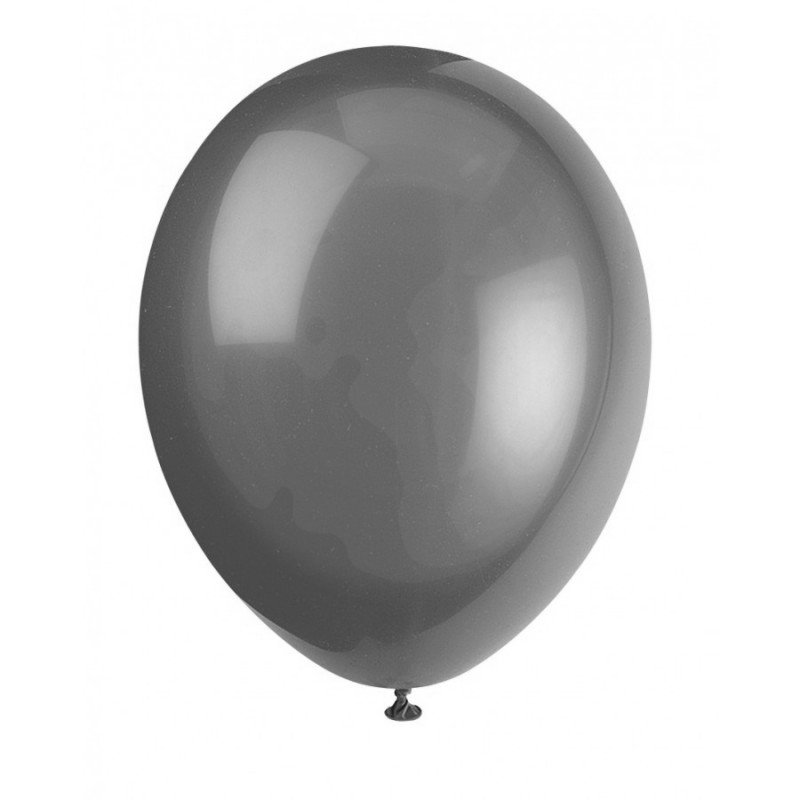

In [5]:
img_ballon = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/balloon.jpg',0)
cv2_imshow(img_ballon)

<ipython-input-6-1314858b20d1>:18: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb


<Figure size 1500x500 with 0 Axes>

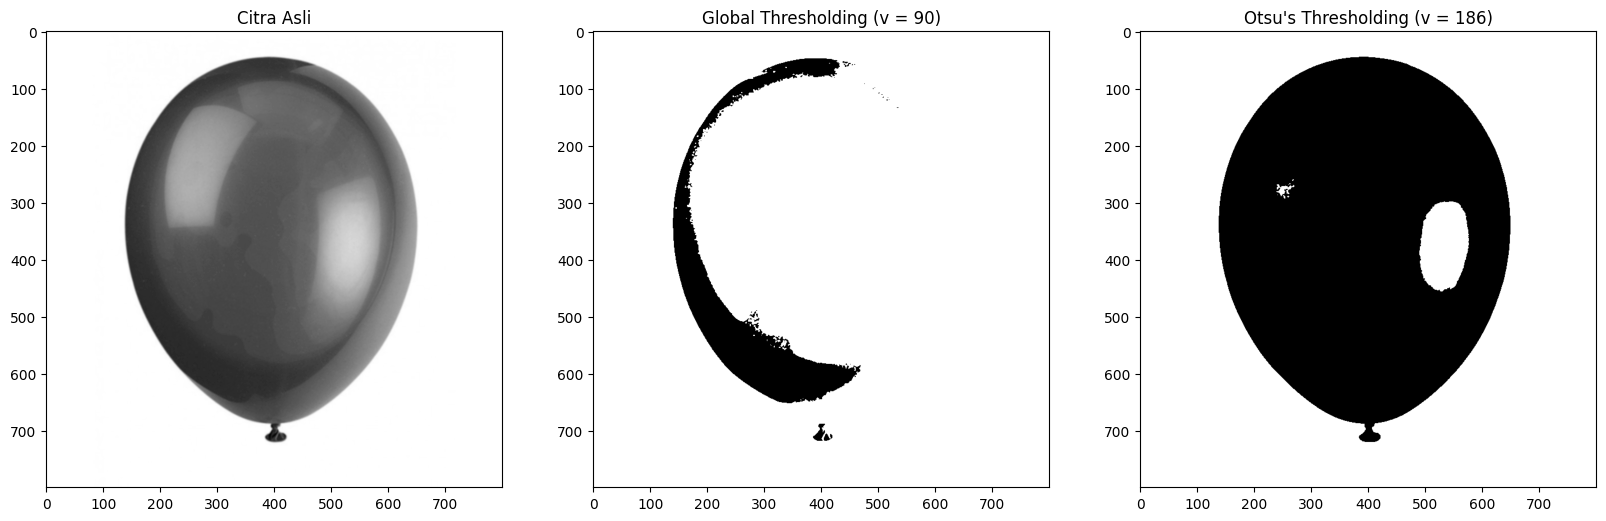

In [6]:
#  Otsu Thresholding
# Hitung nilai threshold menggunakan Otsu Thresholding secara manual
img_ballon = cv. GaussianBlur (img_ballon, (5,5),0)

histogrm = cv.calcHist([img_ballon],[0],None,[256], [0,256]) 
hist_norm = histogrm.ravel()/histogrm.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
variationmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,187):
  wb += histogrm[i] 
  wf = (img_ballon.shape[0]*img_ballon.shape[1]) - wb 
  sumb += (i*histogrm[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  varbetween = wb * wf * (mb - mf) * (mb - mf) 
  if (varbetween>variationmax):
    variationmax = varbetween
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv.threshold(img_ballon, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (img_ballon, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x] 
citra3 = [img_ballon, th1, th2]
plt.figure(figsize = (15,5))

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
plt.show()

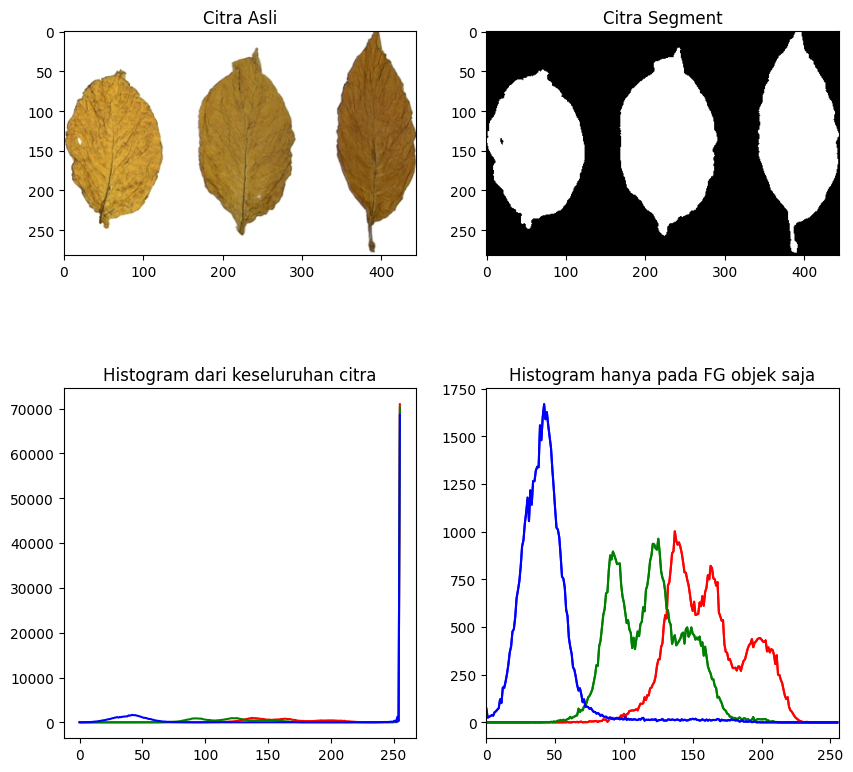

In [9]:
# Histogram dari citra tersegmentasi
# load image in BGR format
img = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/tobacco.jpg') 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

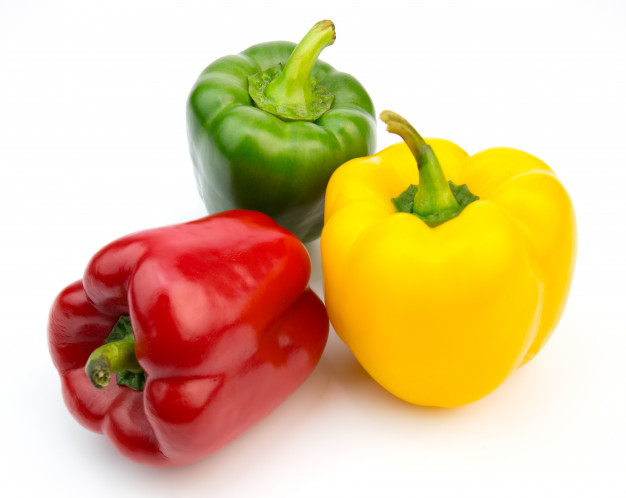

In [10]:
img_p = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/peppers.jpg')
cv2_imshow(img_p)

Text(0.5, 1.0, 'Yellow Segmented Image')

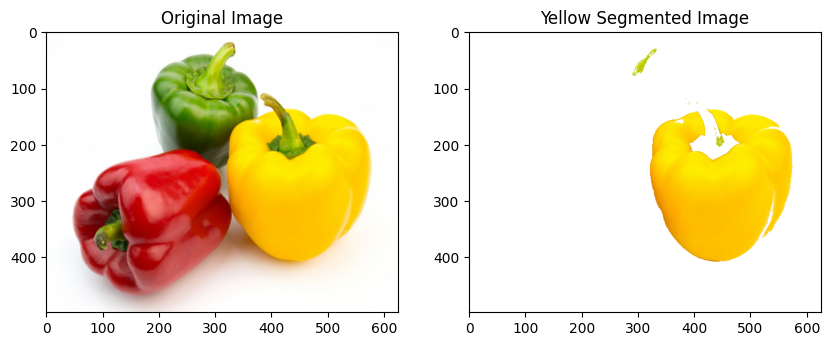

In [11]:
# Konversi warna
img_rgb = cv.cvtColor(img_p, cv.COLOR_BGR2RGB)

# Konversi gambar ke tipe data float32
img_float = np.float32(img_rgb.reshape((-1, 3)))

# Parameter untuk K-Means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
attempts = 10
flags = cv.KMEANS_RANDOM_CENTERS

# Menjalankan parameter K-Means
ret, label, center = cv.kmeans(img_float, K, None, criteria, attempts, flags)

# Mengubah tipe data 
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img_rgb.shape))

# Mengambil piksel warna kuning 
hsv = cv.cvtColor(res2, cv.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Menggabungkan mask dan gambar asli
result = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

# Membuat background menjadi putih
background = np.zeros_like(result)
background.fill(255)

# Menambahkan gambar ke background putih
mask_3d = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
result[mask_3d == 0] = background[mask_3d == 0]

# Menampilkan gambar
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(result)
plt.title('Yellow Segmented Image')

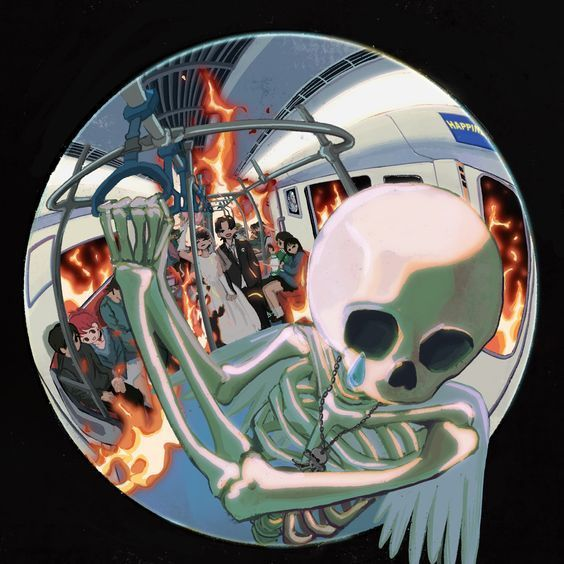

In [12]:
img_rijal = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/rijal.jpg')
cv2_imshow(img_rijal)

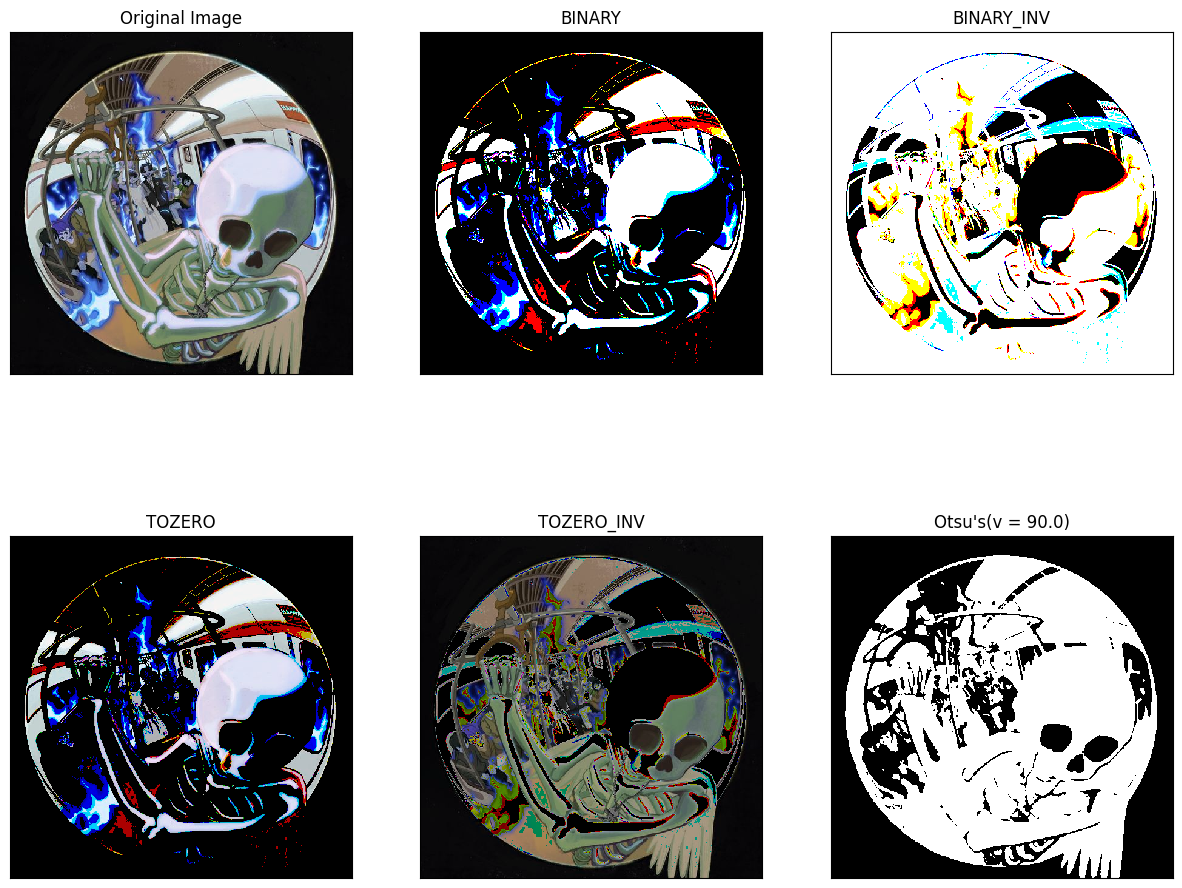

In [14]:
img_gray= cv.cvtColor(img_rijal, cv.COLOR_RGB2GRAY)
blur = cv.GaussianBlur(img_gray,(5,5),0)
thresh = 168

ret, thresh1 = cv.threshold(img_rijal, thresh,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img_rijal, thresh,255,cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img_rijal, thresh,255,cv.THRESH_TOZERO)
ret, thresh4 = cv.threshold(img_rijal, thresh,255,cv.THRESH_TOZERO_INV)
ret2, th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's(v = ") + str(ret2)+")"
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TOZERO', 'TOZERO_INV',x]
images = [img_rijal, thresh1, thresh2, thresh3, thresh4, th2]

plt.figure(figsize = (15,12))

for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()